In [ ]:
'''
Machine Learning Example using Sci-kit
'''

In [5]:
# Retrieving Data
'''
API Name: New York Times
URL: https://github.com/nytimes/covid-19-data/blob/master/us-states.csv
'''
import pandas as pd  
import numpy as np
import requests
import matplotlib.pyplot as plt  
import seaborn as seabornInstance
from pprint import pprint
from sklearn.model_selection import train_test_split 
from sklearn import metrics

# Retrieve data in csv form through raw Github format stored in variable
url = 'https://raw.githubusercontent.com/nytimes/covid-19-data/master/us-states.csv'


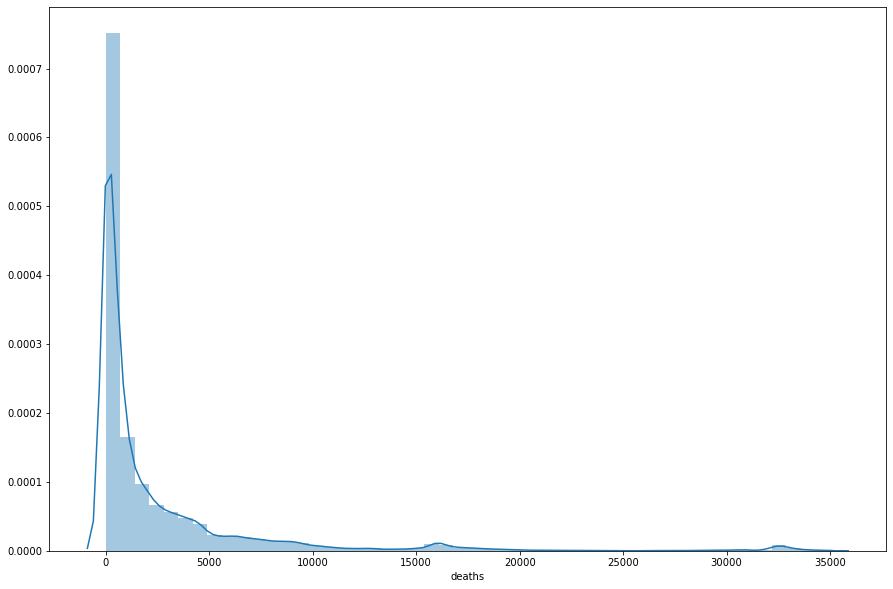

In [23]:
# Data Cleaning and Preprocessing
# Converts the data into pandas data frame
df = pd.read_csv(url)
df.head()
# df.describe()

plt.figure(figsize=(15,10))
plt.tight_layout()
seabornInstance.distplot(df['deaths'])

In [24]:
# Analyzing Data 1
# Using Linear Regression and is supervised
from sklearn.linear_model import LinearRegression
X = df['cases'].values.reshape(-1,1)
y = df['deaths'].values.reshape(-1,1)
# initializes the tests and size
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
regressor = LinearRegression()
regressor.fit(X_train, y_train) # trains the algorithm
# sets the prediction for the model and tests
y_pred = regressor.predict(X_test)
df = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_pred.flatten()})
df

,Actual,Predicted
0,285,838.614228
1,5279,9212.009748
2,2762,1737.910982
3,0,447.624058
4,2,448.592215
...,...,...
3122,215,1162.462716
3123,512,2497.188042
3124,3,448.955274
3125,105,848.900895


In [25]:
# Analyzing Data 2
# Uses KMeans and is unsupervised
# Find groups of data sets that are similar to one another to create clusters
from sklearn.cluster import KMeans
model = KMeans(n_clusters = 4) # using a cluster number of 2 for best fit
model.fit(df)
y_model = model.predict(df)
freq = {}
for label in model.labels_:
    if label in freq.keys():
        freq[label] += 1
    else:
        freq[label] = 1
for key in freq.keys():
    print(key, freq[key])

0 2497
1 522
3 44
2 64


In [26]:
# Analyzing Data 3
# Uses Decision Tree to compare predicted deaths with actual death count
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier(min_samples_split=2)
model.fit(X_train, y_train) #trains the model
actual = y_test
predicted = model.predict(X_test)
print(metrics.classification_report(actual, predicted, zero_division=1))
print(metrics.confusion_matrix(actual, predicted))

              precision    recall  f1-score   support

           0       0.76      0.88      0.81       186
           1       0.17      0.12      0.14        32
           2       0.45      0.43      0.44        70
           3       0.14      0.14      0.14        14
           4       0.23      0.27      0.25        11
           5       0.08      0.08      0.08        13
           6       0.41      0.47      0.44        51
           7       0.24      0.31      0.27        13
           8       0.06      0.06      0.06        16
           9       0.17      0.25      0.20         8
          10       0.22      0.15      0.18        13
          11       0.50      0.33      0.40         6
          12       0.00      0.00      0.00         9
          13       0.00      0.00      0.00         3
          14       0.12      0.08      0.10        12
          15       0.00      0.00      0.00        12
          16       0.30      0.21      0.25        14
          17       0.30    

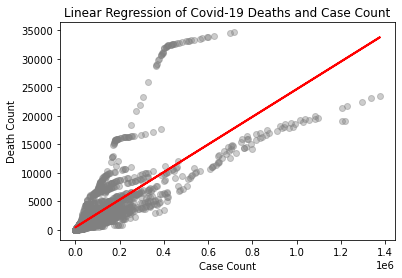

In [27]:
# Visualizing Data 1
# Visualizes the regression in the 1st Analyzation
# Represents the linear regression of the predicted values from the regression model
plt.scatter(X_test, y_test,  color='gray', alpha = 0.4)
plt.plot(X_test, y_pred, color='red', linewidth=2)
plt.title('Linear Regression of Covid-19 Deaths and Case Count')
plt.ylabel('Death Count')
plt.xlabel('Case Count')
plt.show()



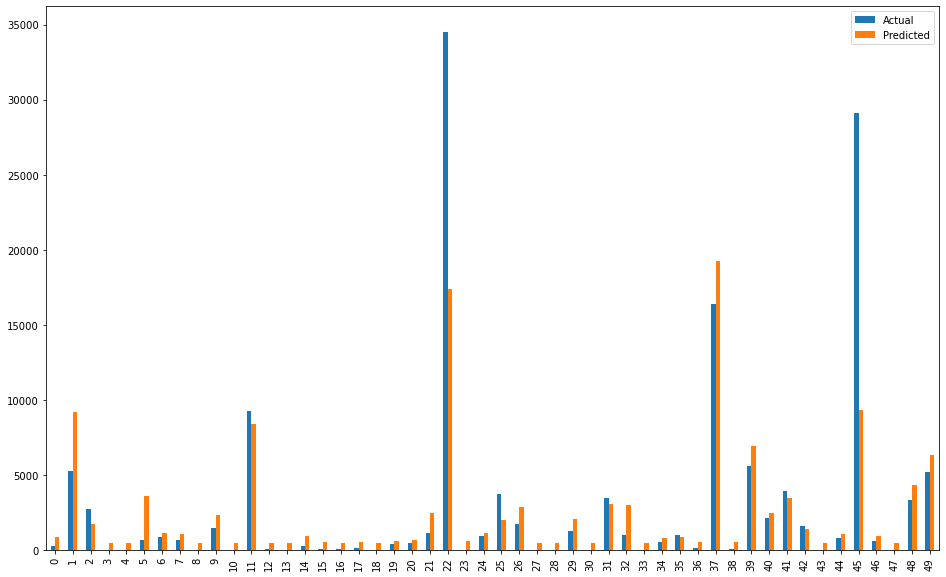

In [28]:
# Visualizing Data 2
# Visualizes Data of 2nd Analyzation
# Represents a bar graph of the comparison between the actual and predicted COVID-19 deaths
# from the resulting Decision Tree
df1 = df.head(50)
df1.plot(kind='bar',figsize=(16,10))
plt.show()

In [ ]:
'''
Data Science Example
'''

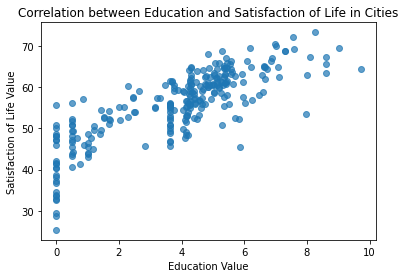

In [21]:
# URL used: https://api.teleport.org/api/urban_areas
# API Name: Teleport
# Research Question: Is there a correlation between Satisfaction of Life and Education?

response = requests.get('https://api.teleport.org/api/urban_areas')
#iterate through all cities to get satisfaction of life and other data

response.status_code
data = response.json()

city_list = [] #list of all cities
city_score = [] #list for all satisfaction scores of each city
edu_score = [] #list for all education scores of each city
for i in range(len(data['_links']['ua:item'])):
    city = data['_links']['ua:item'][i]['href']
    city_name = city[46:-1] #strips url to obtain solely the name of the city
    city_list.append(city_name) #adds to city list
for cities in city_list:
    #Go through the scores of each city in the list via the API
    city_response = requests.get('https://api.teleport.org/api/urban_areas/slug:'+ cities +'/scores/')
    city_data = city_response.json()
    sat_life = city_data['teleport_city_score'] #stores satisfaction value of each city
    city_score.append(sat_life) #adds to satisfaction list
    education = city_data['categories'][9]['score_out_of_10'] #stores education value of each city
    edu_score.append(education) #adds to education list
plt.scatter(edu_score, city_score, alpha = 0.7) #plots correlation of education and satisfaction of life
plt.title('Correlation between Education and Satisfaction of Life in Cities')
plt.ylabel('Satisfaction of Life Value')
plt.xlabel('Education Value')
plt.show()

In [ ]:
'''
Cryptocurrency Tracker to track the best performing currency
'''

In [6]:
response = requests.get('https://api.coingecko.com/api/v3/search/trending')
data = response.json()
market_cap_rank = [] #gets the market cap ranking
labels = [] #labels for cryptocurrency
for i in range(len(data['coins'])):
    market_cap = data['coins'][i]['item']['market_cap_rank'] #retrieve market cap ranking
    coin_name = data['coins'][i]['item']['name'] #retrieve name of cryptocurrency
    market_cap_rank.append(market_cap) #add to lists
    labels.append(coin_name)
data_json = {} #json object with currency as key and rank as value
for j in range(len(labels)): #create keys and values
    data_json[labels[j]] = 'Rank: ' + str(market_cap_rank[j]) 
pprint (data_json)
highest_rank = ''
for k in range(len(data['coins'])): #retrieve highest ranking currency
    if (data['coins'][k]['item']['market_cap_rank'] == min(market_cap_rank)):
        highest_rank = data['coins'][k]['item']['name']
print ("Today's Highest Peforming Cryptocurrency: " + highest_rank)

{'1inch': 'Rank: 116',
 'Kusama': 'Rank: 44',
 'OctoFi': 'Rank: 407',
 'Polkadot': 'Rank: 5',
 'Polkastarter': 'Rank: 243',
 'The Graph': 'Rank: 52',
 'Uniswap': 'Rank: 29'}
Today's Highest Peforming Cryptocurrency: Polkadot
